## UNDERSTANDING MULTIPLE LINEAR REGRESSION:
### SESSION AGENDA:

To build the following models and understand performance of each of the following:

    1. Multiple Linear Regression Model with all attributes
    2. Box-Cox Transformations
    3. Multiple Linear Regression Model after addressing Multicolinearity (VIF)
    4. Multiple Linear Regression Model after VIF + Recursive Feature Elimination (RFE)


## Business Problem

Ecommerce company based in a City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
The company aims to uncover the combination of factors that <b> consistently lead to higher yearly spending by customers. </b>


## About the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

In [ ]:
# Install the required packages for data analysis and visualization
# %pip install pandas matplotlib numpy seaborn scikit-learn plotly statsmodels

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')
import os
import statsmodels.api as sm
import sklearn

In [82]:
# Read the dataset
customers = pd.read_csv("Ecommerce Customers.csv")

#### Check the head of customers, and invoke its info() and describe() methods:

In [83]:
customers.head(4) # snapshot of the data

Email  \
0                   kyang@diaz.org   
1                 asilva@yahoo.com   
2              william82@gmail.com   
3  jeffrey54@mcdonald-williams.com   

                                            Address      Avatar  \
0  223 Love Trail Suite 831\nPort Jeffrey, IN 46849   OliveDrab   
1                        USNV Johnson\nFPO AP 19026       Wheat   
2        11143 Park Squares\nSamanthatown, UT 97073  SandyBrown   
3  297 Francis Valley\nSouth Lindsey, NY 13669-5367   Gainsboro   

  Avg. Session Length  Time on App Time on Website Length of Membership  \
0         34.37425805  15.12699429     37.15762409          5.377593584   
1         34.60331112  12.20729849     33.91384725          6.922689335   
2                   ?            #             NaN                  NaN   
3         34.96760989   13.9194944     37.95201319          5.066696864   

   Yearly Amount Spent  Gender  
0           765.518462  Female  
1           744.221867    Male  
2                  NaN    Male  
3           712.396327  Female

In [84]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    object 
 4   Time on App           499 non-null    object 
 5   Time on Website       498 non-null    object 
 6   Length of Membership  498 non-null    object 
 7   Yearly Amount Spent   495 non-null    float64
 8   Gender                500 non-null    object 
dtypes: float64(1), object(8)
memory usage: 35.3+ KB


In [85]:
# Apply simple imputer to fill missing values
import pandas as pd
from sklearn.impute import SimpleImputer

# Drop un-needed non-feature columns
customers = customers.drop(columns=['Email', 'Address', 'Avatar'])

# Segregate the target variable from the attributes
customers_features = customers.drop(columns='Yearly Amount Spent')

symbols = ['#', '$', '?', '%', 'NULL', 'NA', 'NaN']
for symbol in symbols:
    customers_features.replace({symbol: np.nan}, inplace=True)
    
# Corece numerical columns to 'float' type
customers_features['Avg. Session Length'] = customers_features['Avg. Session Length'].astype(float)
customers_features['Time on App'] = customers_features['Time on App'].astype(float)
customers_features['Time on Website'] = customers_features['Time on Website'].astype(float)
customers_features['Length of Membership'] = customers_features['Length of Membership'].astype(float)

# Separate categorical and numerical columns
categorical_cols = customers_features.select_dtypes(include=['object', 'category']).columns
numerical_cols = customers_features.select_dtypes(include=['number']).columns

# Use simple imputer from scikit-learn to perform the imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

# Apply the imputer on categorical columns
customers_features[categorical_cols] = categorical_imputer.fit_transform(customers_features[categorical_cols])
# Apply the imputer on numerical columns
customers_features[numerical_cols] = numerical_imputer.fit_transform(customers_features[numerical_cols])

# Ensure 'Yearly Amount Spent' remains unchanged in 'customers'
yearly_amount_spent = customers['Yearly Amount Spent']
customers.update(customers_features)
# Convert 'object' type columns in 'customers' to 'float' where appropriate
customers['Yearly Amount Spent'] = yearly_amount_spent

#Convert obj back to float in 'customers'
customers['Avg. Session Length'] = customers['Avg. Session Length'].astype(float)
customers['Time on App'] = customers['Time on App'].astype(float)
customers['Time on Website'] = customers['Time on Website'].astype(float)
customers['Length of Membership'] = customers['Length of Membership'].astype(float)

In [86]:
# Check for remaining missing values (NaN, special symbols)
missing_values_summary = (customers.isnull() | customers.isin(symbols)).sum()
missing_values_summary

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     5
Gender                  0
dtype: int64

In [87]:
# Remove rows containing 'NaN's for the target variable 'Yearly Amount Spent'
customers = customers.dropna(subset=['Yearly Amount Spent'])

missing_values_summary = (customers.isnull() | customers.isin(symbols)).sum()
missing_values_summary

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
Gender                  0
dtype: int64

In [88]:
customers.shape

(495, 6)

In [89]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   495 non-null    float64
 1   Time on App           495 non-null    float64
 2   Time on Website       495 non-null    float64
 3   Length of Membership  495 non-null    float64
 4   Yearly Amount Spent   495 non-null    float64
 5   Gender                495 non-null    object 
dtypes: float64(5), object(1)
memory usage: 27.1+ KB


In [90]:
customers.describe() # summary to understand the data, prints the summary only for numeric attributes by default

Avg. Session Length  Time on App  Time on Website  \
count           495.000000   495.000000       495.000000   
mean             33.044068    12.036272        37.058711   
std               0.992314     0.987478         1.004565   
min              29.532429     8.508152        33.913847   
25%              32.337444    11.383016        36.357741   
50%              33.077731    11.975406        37.069367   
75%              33.706633    12.725793        37.690819   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            495.000000           495.000000  
mean               3.517310           547.848839  
std                0.976479          1104.276373  
min                0.269901           266.086341  
25%                2.929280           445.014369  
50%                3.532517           497.811930  
75%                4.109641           548.763378  
max                6.922689         25006.670580

In [91]:
customers.describe(include=['object'])

Gender
count     495
unique      2
top      Male
freq      259

## Error metrics to evaluate the model:
### Let's evaluate model performance by calculating various error metrics for regression including R-squared (R^2).

In [92]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#defining MAPE

In [93]:
from sklearn import metrics
import numpy as np

scores=pd.DataFrame(columns=['Model','MAE_Train','MSE_Train','RMSE_Train','MAPE_Train','MAE_Test','MSE_Test','RMSE_Test','MAPE_Test','R2'])

def mean_absolute_percentage_error(y_true, y_pred):
    # Calculate Mean Absolute Percentage Error (MAPE)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def get_metrics(y_train, y_train_pred, y_test, y_test_pred, model_name, scores):
    # Calculate metrics
    MAE_Train = metrics.mean_absolute_error(y_train, y_train_pred)
    MSE_Train = metrics.mean_squared_error(y_train, y_train_pred)
    RMSE_Train = np.sqrt(MSE_Train)
    MAPE_Train = mean_absolute_percentage_error(y_train, y_train_pred)
    RSE_Train = np.sum((y_train - y_train_pred) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2)
    RAE_Train = np.sum(np.abs(y_train - y_train_pred)) / np.sum(np.abs(y_train - np.mean(y_train)))
    
        
    MAE_Test = metrics.mean_absolute_error(y_test, y_test_pred)
    MSE_Test = metrics.mean_squared_error(y_test, y_test_pred)
    RMSE_Test = np.sqrt(MSE_Test)
    MAPE_Test = mean_absolute_percentage_error(y_test, y_test_pred)
    RSE_Test = np.sum((y_test - y_test_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
    RAE_Test = np.sum(np.abs(y_test - y_test_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))
    R2 = metrics.r2_score(y_train, y_train_pred)
    # R2_formatted = np.format_float_scientific(R2, precision=5)  # or use format if you want
            
    # Create a DataFrame with new metrics
    new_metrics = pd.DataFrame({
        'Model'     : [model_name],
        'MAE_Train' : [MAE_Train],
        'MSE_Train' : [MSE_Train],
        'RMSE_Train': [RMSE_Train],
        'MAPE_Train': [MAPE_Train],
        'RAE_Train' : [RAE_Train],
        'RSE_Train' : [RSE_Train],
        'MAE_Test'  : [MAE_Test],
        'MSE_Test'  : [MSE_Test],
        'RMSE_Test' : [RMSE_Test],
        'MAPE_Test' : [MAPE_Test],
        'RAE_Test'  : [RAE_Test],
        'RSE_Test'  : [RSE_Test],
             'R2'   : [R2]
    })
    # Update scores DataFrame
    # scores = new_metrics
    # Append the new metrics to the existing scores DataFrame
    scores = pd.concat([scores, new_metrics], ignore_index=True)
    return scores

# Coefficients

In [94]:
# Define a global DataFrame to store coefficients
coefficients_model = pd.DataFrame()

# Function definition to store the coefficients of the models (also appends coeffs for every model)
def coeff(model_title, modelparams):
    global coefficients_model  # Refer to the global DataFrame
    tempdf = pd.DataFrame(modelparams)
    tempdf.rename(columns={0: model_title}, inplace=True)
    coefficients_model = pd.concat([coefficients_model, tempdf], axis=1)
    return coefficients_model

## Multiple Regression model with ALL attributes (including Categorical) - Dummification

In [95]:
XWithCateg = customers.drop(['Yearly Amount Spent'], axis=1) #independent attributes
y = customers['Yearly Amount Spent']

In [96]:
XWithCateg.head()

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.374258    15.126994        37.157624              5.377594   
1            34.603311    12.207298        33.913847              6.922689   
3            34.967610    13.919494        37.952013              5.066697   
4            34.385820    12.729720        37.069367              5.705941   
5            34.507551    11.975406        37.635756              5.705154   

   Gender  
0  Female  
1    Male  
3  Female  
4  Female  
5    Male

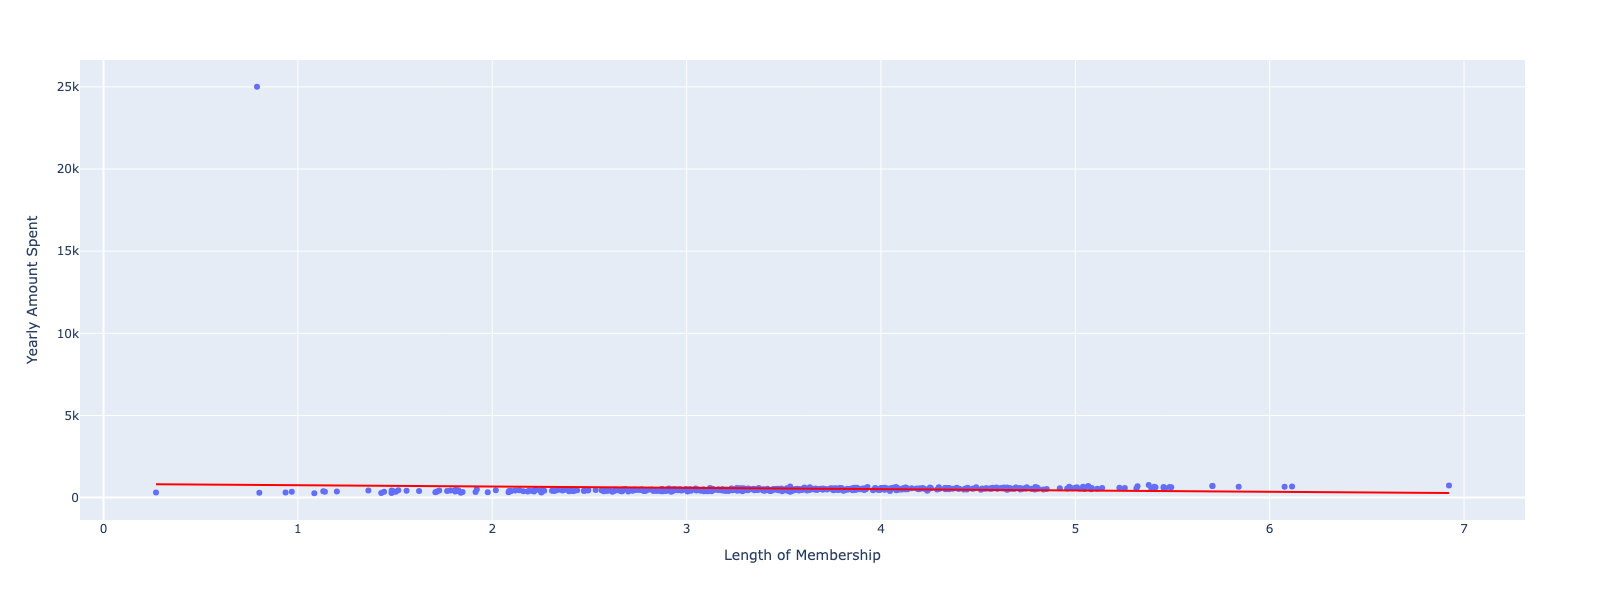

In [97]:
import plotly.express as px
# Scatter plot of Length of Membership vs Yearly Amount Spent 
fig_with_outliers = px.scatter(customers, x="Length of Membership", y="Yearly Amount Spent", trendline="ols")

# Update the trendline color to red
fig_with_outliers.update_traces(line=dict(color='red'))

# Update the layout to resize the figure
fig_with_outliers.update_layout(
    width=900,  # Width in pixels (10 inches * 100 pixels per inch)
    height=600   # Height in pixels (6 inches * 100 pixels per inch)
)
fig_with_outliers.show() #plotting scatter plot with "Avg. Session Length","Time on App"

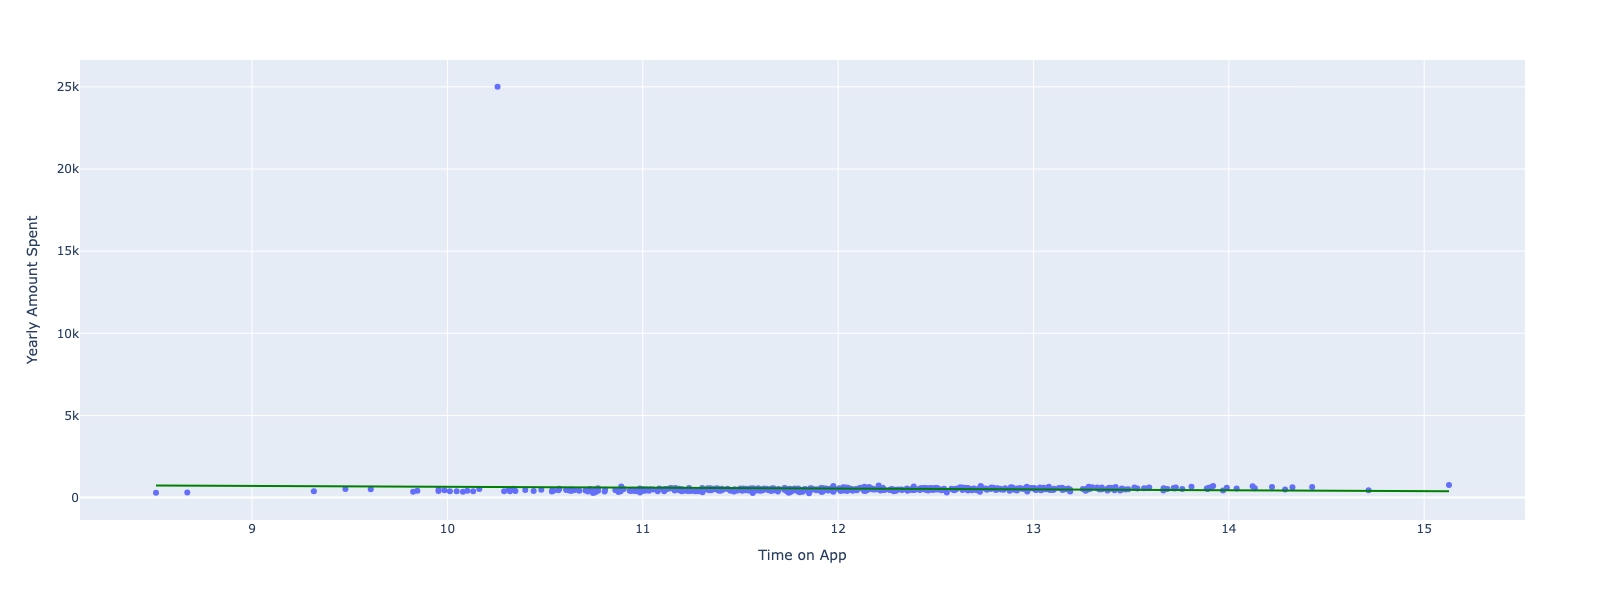

In [98]:
import plotly.express as px
# Scatter plot of Length of Membership vs Yearly Amount Spent 
fig_with_outliers = px.scatter(customers, x="Time on App", y="Yearly Amount Spent", trendline="ols")

# Update the trendline color to red
fig_with_outliers.update_traces(line=dict(color='green'))

# Update the layout to resize the figure
fig_with_outliers.update_layout(
    width=900,  # Width in pixels (10 inches * 100 pixels per inch)
    height=600   # Height in pixels (6 inches * 100 pixels per inch)
)
fig_with_outliers.show() #plotting scatter plot with "Avg. Session Length","Time on App"

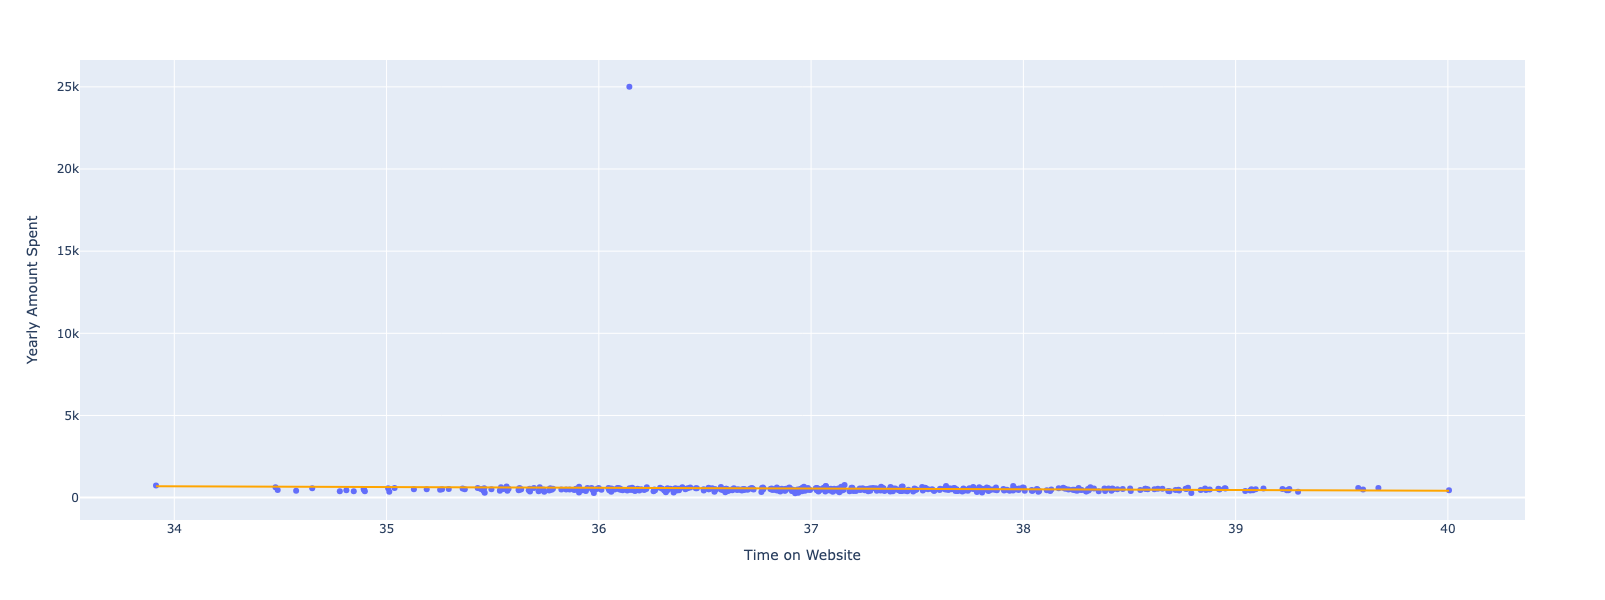

In [99]:
import plotly.express as px
# Scatter plot of Length of Membership vs Yearly Amount Spent 
fig_with_outliers = px.scatter(customers, x="Time on Website", y="Yearly Amount Spent", trendline="ols")

# Update the trendline color to red
fig_with_outliers.update_traces(line=dict(color='orange'))

# Update the layout to resize the figure
fig_with_outliers.update_layout(
    width=900,  # Width in pixels (10 inches * 100 pixels per inch)
    height=600   # Height in pixels (6 inches * 100 pixels per inch)
)
fig_with_outliers.show() #plotting scatter plot with "Avg. Session Length","Time on App"

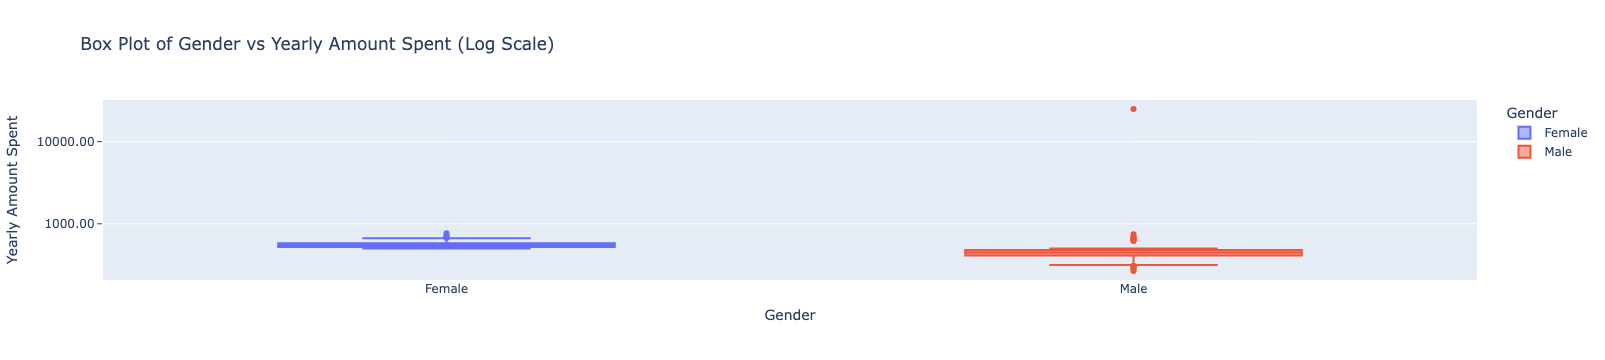

In [100]:
import plotly.express as px

# Assuming 'customers' dataframe contains 'Gender' and 'Yearly Amount Spent' columns
fig = px.box(customers, x='Gender', y='Yearly Amount Spent', 
             title='Box Plot of Gender vs Yearly Amount Spent (Log Scale)',
             labels={'Gender': 'Gender', 'Yearly Amount Spent': 'Yearly Amount Spent'},
             color='Gender')  # This will assign separate colors for each Gender

# Update layout to use a logarithmic scale for the y-axis and refine tick formatting
fig.update_layout(
    yaxis_type="log",
    yaxis_tickformat='.2f',  # Format the ticks with two decimal places for smoothness
    yaxis_ticks='outside',   # Keep the ticks outside for clarity
    yaxis_showgrid=True,     # Show gridlines for better visual clarity on a log scale
    yaxis_tickvals=[10, 100, 1000, 10000, 100000]  # Specify appropriate tick values
)

# To show the plot
fig.show()


In [101]:
sns.pairplot(customers) #pair plot - customers contains numerical columns only

In [102]:
customers_numeric_cols = customers.select_dtypes(include=['float64'])
sns.heatmap(customers_numeric_cols.corr(),annot=True,cmap='Greens') #correlation plot

<Axes: >

In [103]:
#Dummification
XWithCategEncoded = pd.get_dummies(XWithCateg, drop_first=True,dtype='int16')
XWithCategEncoded.head(3)

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.374258    15.126994        37.157624              5.377594   
1            34.603311    12.207298        33.913847              6.922689   
3            34.967610    13.919494        37.952013              5.066697   

   Gender_Male  
0            0  
1            1  
3            0

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XWithCategEncoded, y, test_size=0.2, random_state=101) #train test split
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((396, 5), (396,), (99, 5), (99,))

In [105]:
import statsmodels.api as sm
# adding the Constant term
X_train= sm.add_constant(X_train)
X_train.head()

X_test= sm.add_constant(X_test)
X_test.head()

const  Avg. Session Length  Time on App  Time on Website  \
151    1.0            32.567230    12.489013        36.371480   
21     1.0            33.871038    12.026925        34.476878   
455    1.0            33.503810    11.233415        37.211153   
363    1.0            32.179100    11.187539        40.005182   
443    1.0            33.976083    11.658037        37.425279   

     Length of Membership  Gender_Male  
151              4.222436            0  
21               5.493507            1  
455              2.320550            1  
363              3.552650            1  
443              2.086348            1

In [106]:
print(X_train.columns)
print("\n")
print(X_test.columns)
print("\n")
print("\n No. of columns in Train Data :{}".format(len(X_train.columns)))
print("\n No. of columns in Test Data :{}".format(len(X_test.columns)))

Index(['const', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Gender_Male'],
      dtype='object')


Index(['const', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Gender_Male'],
      dtype='object')



 No. of columns in Train Data :6

 No. of columns in Test Data :6


In [107]:
multiple_reg_Cat = sm.OLS(y_train, X_train).fit()
print(multiple_reg_Cat.summary()) #build a model using all attributes

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.022
Model:                             OLS   Adj. R-squared:                  0.009
Method:                  Least Squares   F-statistic:                     1.737
Date:                 Sat, 21 Sep 2024   Prob (F-statistic):              0.125
Time:                         16:21:06   Log-Likelihood:                -3375.9
No. Observations:                  396   AIC:                             6764.
Df Residuals:                      390   BIC:                             6788.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

In [108]:
coeff("MLR_All_incl_Categorical_features", multiple_reg_Cat.params)

MLR_All_incl_Categorical_features
const                                       6567.421165
Avg. Session Length                          -33.034000
Time on App                                 -112.991482
Time on Website                              -71.970542
Length of Membership                        -204.159096
Gender_Male                                 -332.491951

In [109]:
# get error metrics
scores = get_metrics(y_train, multiple_reg_Cat.predict(X_train), y_test, multiple_reg_Cat.predict(X_test), "MLR_with_Categ_attributes", scores)
scores

Model   MAE_Train     MSE_Train   RMSE_Train  \
0  MLR_with_Categ_attributes  236.143762  1.486420e+06  1219.188174   

   MAPE_Train   MAE_Test      MSE_Test   RMSE_Test  MAPE_Test        R2  \
0   39.056428  156.49854  41288.559685  203.195865  31.798621  0.021787   

   RAE_Train  RSE_Train  RAE_Test  RSE_Test  
0   1.659035   0.978213  2.935542  8.755543

### Box-Cox transformation: 
#### First Scenario: On just the attributes ('X'):

In [111]:
# Box-Cox Transformation:
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Data input to box-cox must be +ve
print(X_train.head(5))
print(X_train.iloc[:,4].head(5))
X_train_box_cox, lambda_bc = stats.boxcox(X_train.iloc[:,4])
X_test_box_cox, lambda_bc = stats.boxcox(X_test.iloc[:,4])

# Step 2: Add a constant to X for the intercept
X_train_boxcox = sm.add_constant(X_train)
X_test_boxcox = sm.add_constant(X_test)

# Step 3: Fit the multiple linear regression model using the transformed 'X_train' and 'X_test'
modelboxCox = sm.OLS(y_train, X_train_boxcox).fit()

# Step 4: Print the summary of the model
model_summary = modelboxCox.summary()

     const  Avg. Session Length  Time on App  Time on Website  \
216    1.0            32.536775    11.121366        36.979372   
47     1.0            36.139662    12.050267        36.959643   
40     1.0            32.644617    12.637557        36.517086   
165    1.0            32.274594    12.954811        37.108816   
95     1.0            32.726785    12.988510        36.462003   

     Length of Membership  Gender_Male  
216              4.129255            0  
47               3.864861            0  
40               5.226688            0  
165              3.689917            0  
95               4.113226            0  
216    4.129255
47     3.864861
40     5.226688
165    3.689917
95     4.113226
Name: Length of Membership, dtype: float64


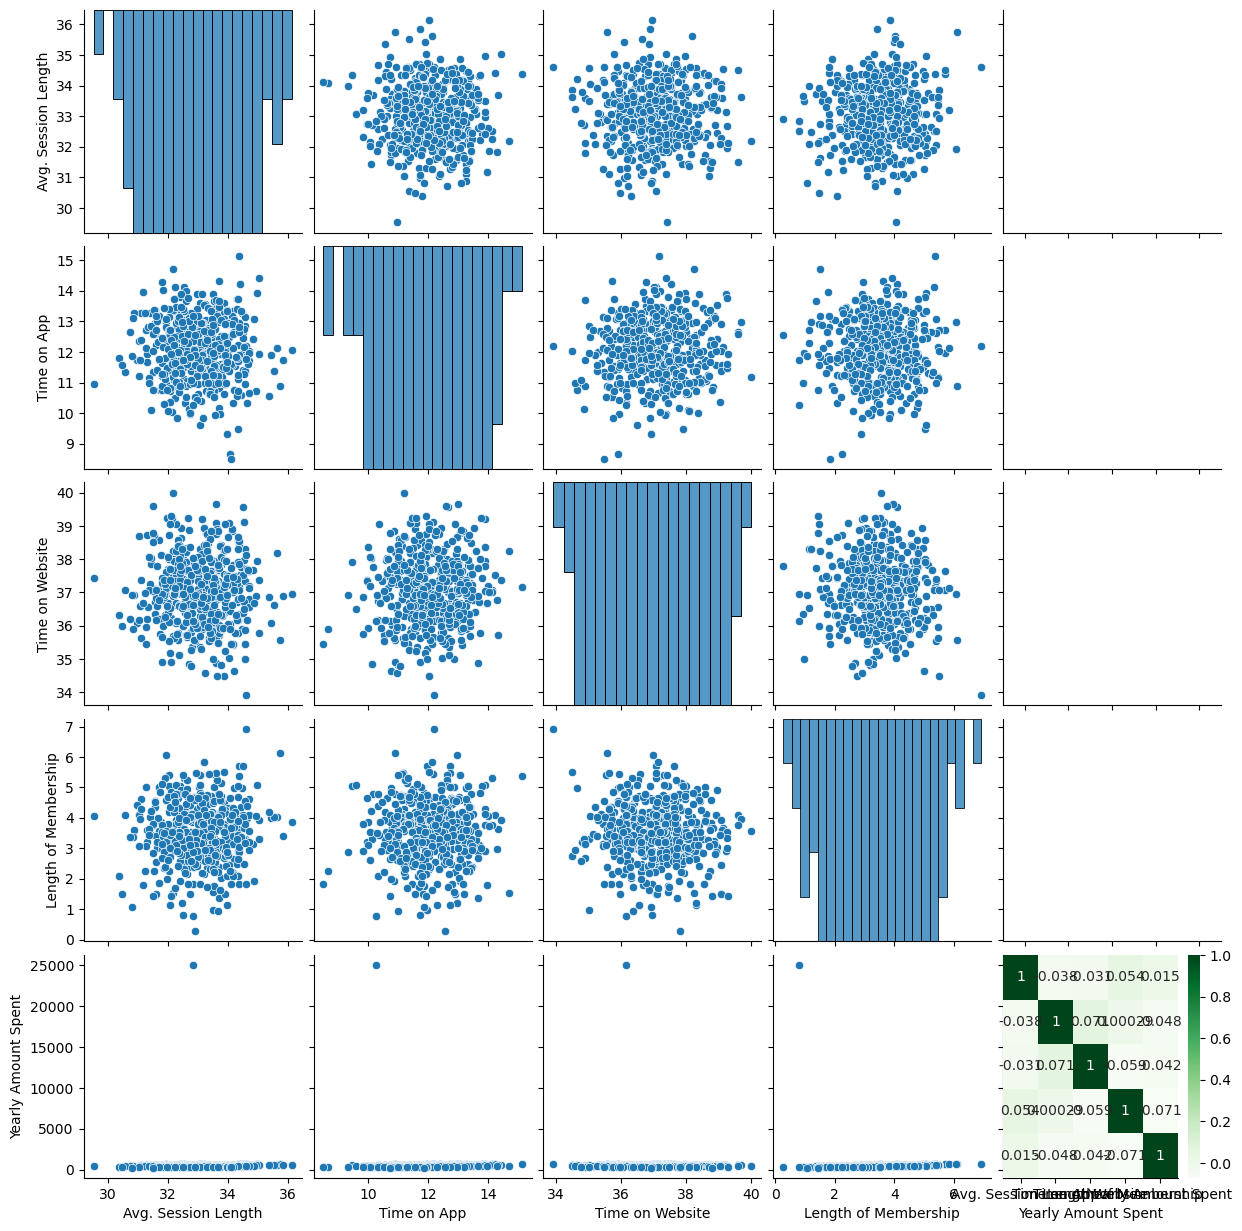

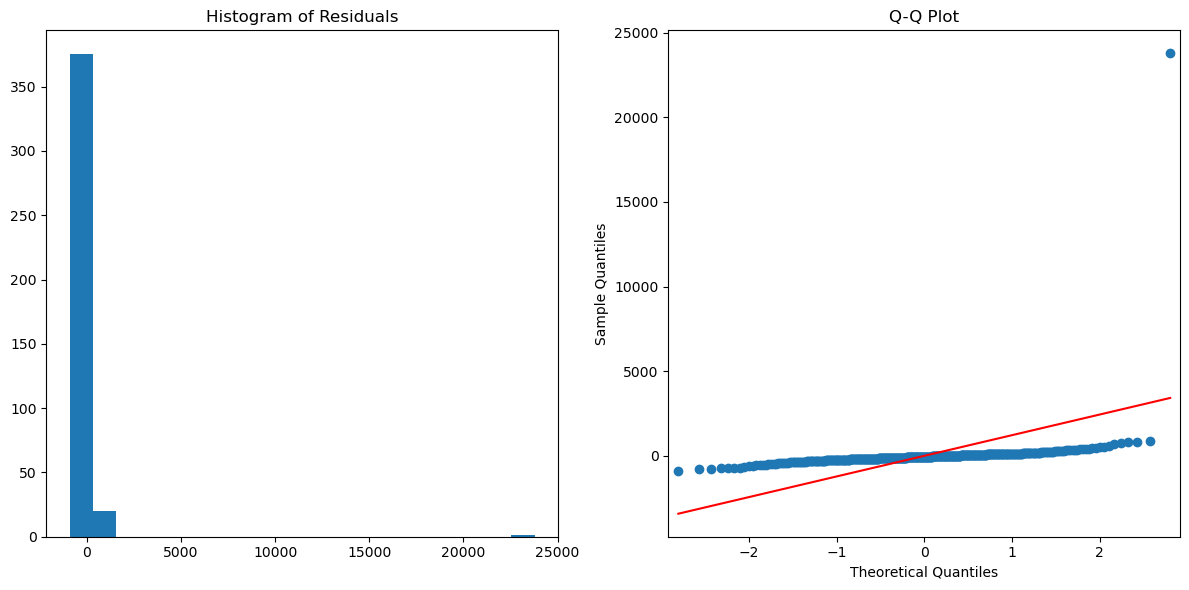

(0.9483922470520018,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                              OLS Regression Results                            
 Dep. Variable:     Yearly Amount Spent   R-squared:                       0.022
 Model:                             OLS   Adj. R-squared:                  0.009
 Method:                  Least Squares   F-statistic:                     1.737
 Date:                 Thu, 19 Sep 2024   Prob (F-statistic):              0.125
 Time:                         18:27:42   Log-Likelihood:                -3375.9
 No. Observations:                  396   AIC:                             6764.
 Df Residuals:                      390   BIC:                             6788.
 Df Model:                            5                                         
 Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------------

In [31]:
# Step 5: Visualize the residuals to check normality and homoscedasticity
residuals = modelboxCox.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of residuals
ax[0].hist(residuals, bins=20)
ax[0].set_title('Histogram of Residuals')

# Q-Q plot
sm.qqplot(residuals, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Show lambda value of Box-Cox transformation and model summary
lambda_bc, model_summary


In [32]:
# Get coefficients of the Box-Cox model
coeff("MLR_All_features_Box_Cox_On-X", modelboxCox.params)

MLR_All_incl_Categorical_features  \
const                                       6567.421165   
Avg. Session Length                          -33.034000   
Time on App                                 -112.991482   
Time on Website                              -71.970542   
Length of Membership                        -204.159096   
Gender_Male                                 -332.491951   

                      MLR_All_features_Box_Cox_On-X  
const                                   6567.421165  
Avg. Session Length                      -33.034000  
Time on App                             -112.991482  
Time on Website                          -71.970542  
Length of Membership                    -204.159096  
Gender_Male                             -332.491951

In [33]:
#Get error metrics
scores = get_metrics(y_train, modelboxCox.predict(X_train_boxcox), y_test, modelboxCox.predict(X_test_boxcox), "MLR_Box_Cox_Transform-On-X", scores)
scores

Model   MAE_Train     MSE_Train   RMSE_Train  \
0   MLR_with_Categ_attributes  236.143762  1.486420e+06  1219.188174   
1  MLR_Box_Cox_Transform-On-X  236.143762  1.486420e+06  1219.188174   

   MAPE_Train   MAE_Test      MSE_Test   RMSE_Test  MAPE_Test        R2  \
0   39.056428  156.49854  41288.559685  203.195865  31.798621  0.021787   
1   39.056428  156.49854  41288.559685  203.195865  31.798621  0.021787   

   RAE_Train  RSE_Train  RAE_Test  RSE_Test  
0   1.659035   0.978213  2.935542  8.755543  
1   1.659035   0.978213  2.935542  8.755543

## Box-Cox Transformation:
#### Second Scenario: Using Box-Cox transformation on the TARGET ('y') variable ('Yearly Amount Spent')

In [34]:
# Box-Cox Transformation:
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Perform the Box-Cox transformation on the dependent variable (Yearly Amount Spent)
# y_train_numeric = pd.to_numeric(y_train, errors='coerce')
y_train_boxcox, lambda_bc = stats.boxcox(y_train)
y_test_boxcox, lambda_bc = stats.boxcox(y_test)

# Step 2: Add a constant to X for the intercept
X_train_boxcox = sm.add_constant(X_train)
X_test_boxcox = sm.add_constant(X_test)
#+
# Step 3: Fit the multiple linear regression model using the transformed y
modelboxCox = sm.OLS(y_train_boxcox, X_train_boxcox).fit()

# Step 4: Print the summary of the model
model_summary = modelboxCox.summary()

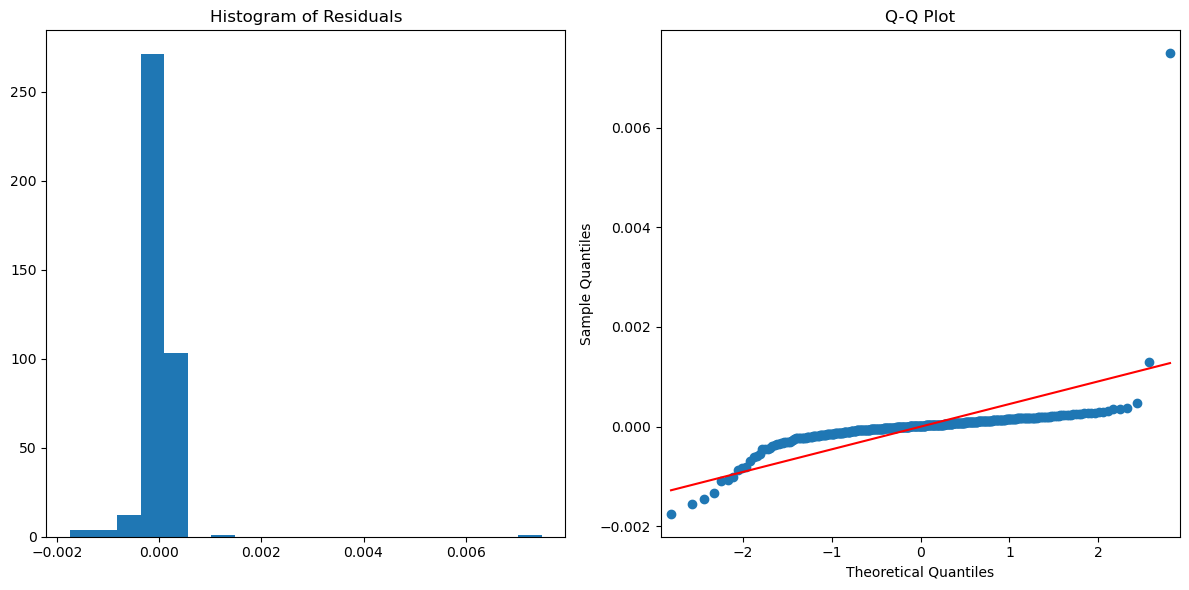

(0.5565590750913505,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      y   R-squared:                       0.725
 Model:                            OLS   Adj. R-squared:                  0.721
 Method:                 Least Squares   F-statistic:                     205.4
 Date:                Thu, 19 Sep 2024   Prob (F-statistic):          7.09e-107
 Time:                        18:28:21   Log-Likelihood:                 2485.6
 No. Observations:                 396   AIC:                            -4959.
 Df Residuals:                     390   BIC:                            -4935.
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------------

In [35]:
# Step 5: Visualize the residuals to check normality and homoscedasticity
residuals = modelboxCox.resid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Histogram of residuals
ax[0].hist(residuals, bins=20)
ax[0].set_title('Histogram of Residuals')

# Q-Q plot
sm.qqplot(residuals, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

# Show lambda value of Box-Cox transformation and model summary
lambda_bc, model_summary


In [36]:
# Get coefficients of the Box-Cox model
coeff("MLR_All_features_Box_Cox_On-y", modelboxCox.params)

MLR_All_incl_Categorical_features  \
const                                       6567.421165   
Avg. Session Length                          -33.034000   
Time on App                                 -112.991482   
Time on Website                              -71.970542   
Length of Membership                        -204.159096   
Gender_Male                                 -332.491951   

                      MLR_All_features_Box_Cox_On-X  \
const                                   6567.421165   
Avg. Session Length                      -33.034000   
Time on App                             -112.991482   
Time on Website                          -71.970542   
Length of Membership                    -204.159096   
Gender_Male                             -332.491951   

                      MLR_All_features_Box_Cox_On-y  
const                                      1.135659  
Avg. Session Length                        0.000247  
Time on App                                0.000341  
Time on Website                            0.000003  
Length of Membership                       0.000556  
Gender_Male                               -0.000082

In [37]:
#Get error metrics
scores = get_metrics(y_train_boxcox, modelboxCox.predict(X_train_boxcox), y_test_boxcox, modelboxCox.predict(X_test_boxcox), "MLR_Box_Cox_Transform-On-y", scores)
scores

Model   MAE_Train     MSE_Train   RMSE_Train  \
0   MLR_with_Categ_attributes  236.143762  1.486420e+06  1219.188174   
1  MLR_Box_Cox_Transform-On-X  236.143762  1.486420e+06  1219.188174   
2  MLR_Box_Cox_Transform-On-y    0.000164  2.067951e-07     0.000455   

   MAPE_Train    MAE_Test      MSE_Test   RMSE_Test  MAPE_Test        R2  \
0   39.056428  156.498540  41288.559685  203.195865  31.798621  0.021787   
1   39.056428  156.498540  41288.559685  203.195865  31.798621  0.021787   
2    0.014285   54.519927   2991.250401   54.692325  97.921457  0.724761   

   RAE_Train  RSE_Train   RAE_Test    RSE_Test  
0   1.659035   0.978213   2.935542    8.755543  
1   1.659035   0.978213   2.935542    8.755543  
2   0.259843   0.275239  16.181541  158.827271

## Check for Linearity


In [38]:
from scipy import stats
#definition of residual plots function
def residual_plots(results):
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as smf
    from statsmodels.nonparametric.smoothers_lowess import lowess
    from scipy import stats
    import statsmodels.api as sm


    fig, ax = plt.subplots(2,2,figsize=(14,10))
    ########## Residuals vs fitted  ##########
    residuals = results.resid
    fitted = results.fittedvalues
    smoothed = lowess(residuals,fitted)
    top3 = abs(residuals).sort_values(ascending = False)[:3]

    plt.rcParams.update({'font.size': 10})
    plt.rcParams["figure.figsize"] = (8,7)

    ax[0,0].scatter(fitted, residuals, edgecolors = 'k', facecolors = (0, 0, 1, 0.5))
    ax[0,0].plot(smoothed[:,0],smoothed[:,1],color = 'r')
    ax[0,0].set_ylabel('Residuals')
    ax[0,0].set_xlabel('Fitted Values (Predicted Values)')
    ax[0,0].set_title('Residuals vs. Fitted')
    ax[0,0].plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

    for i in top3.index:
        ax[0,0].annotate(i,xy=(fitted[i],residuals[i]))

    #plt.show()


    ######### Normal qq plot ###########
    sorted_student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    sorted_student_residuals.index = results.resid.index
    sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
    df = pd.DataFrame(sorted_student_residuals)
    df.columns = ['sorted_student_residuals']
    df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
    rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
    top3 = rankings[:3]

    #fig, ax = plt.subplots()
    x = df['theoretical_quantiles']
    y = df['sorted_student_residuals']
    ax[0,1].scatter(x,y, edgecolor = 'k',facecolor = (0, 0, 1, 0.5))
    ax[0,1].set_title('Normal Q-Q')
    ax[0,1].set_ylabel('Standardized Residuals')
    ax[0,1].set_xlabel('Theoretical Quantiles')
    ax[0,1].plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
    for val in top3.index:
        ax[0,1].annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
    #plt.show()


    ######### Homoscedasticity ############
    student_residuals = results.get_influence().resid_studentized_internal
    sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
    sqrt_student_residuals.index = results.resid.index
    smoothed = lowess(sqrt_student_residuals,fitted)
    top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

    #fig, ax = plt.subplots()
    ax[1,0].scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = (0, 0, 1, 0.5))
    ax[1,0].plot(smoothed[:,0],smoothed[:,1],color = 'r', label='LOESS Smoothing Line (Trend Line)')
    ax[1,0].set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
    ax[1,0].set_xlabel('Fitted Values (Predicted Values)')
    ax[1,0].set_title('Scale-Location/Spread-Location (Constant Variance of Residuals)')
    ax[1,0].set_ylim(0,max(sqrt_student_residuals)+0.1)
    for i in top3.index:
        ax[1,0].annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
    #plt.show()


    ######### Cooks distance  ###########
    student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
    student_residuals.index = results.resid.index
    df = pd.DataFrame(student_residuals)
    df.columns = ['student_residuals']
    df['leverage'] = results.get_influence().hat_matrix_diag
    smoothed = lowess(df['student_residuals'],df['leverage'])
    sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
    top3 = sorted_student_residuals[:3]

    #fig, ax = plt.subplots()
    x = df['leverage']
    y = df['student_residuals']
    xpos = max(x)+max(x)*0.01
    ax[1,1].scatter(x, y, edgecolors = 'k', facecolors = (0, 0, 1, 0.5))
    ax[1,1].plot(smoothed[:,0],smoothed[:,1],color = 'g')
    ax[1,1].set_ylabel('Studentized Residuals')
    ax[1,1].set_xlabel('Leverage')
    ax[1,1].set_title('Residuals vs. Leverage')
    ax[1,1].set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
    ax[1,1].set_xlim(-0.01,max(x)+max(x)*0.05)
    plt.tight_layout()
    for val in top3.index:
        ax[1,1].annotate(val,xy=(x.loc[val],y.loc[val]))

    cooksx = np.linspace(min(x), xpos, 50)
    p = len(results.params)
    poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
    poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
    negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
    negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

    ax[1,1].plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
    ax[1,1].plot(cooksx,poscooks05y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks1y, ls = ':', color = 'r')
    ax[1,1].plot(cooksx,negcooks05y, ls = ':', color = 'r')
    ax[1,1].plot([0,0],ax[1,1].get_ylim(), ls=":", alpha = .3, color = 'k')
    ax[1,1].plot(ax[1,1].get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
    ax[1,1].annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
    ax[1,1].annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
    ax[1,1].annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
    ax[1,1].legend()
    plt.show()

### Residuals Analysis - Residuals-vs-Fitted, QQ Plot, Scale-Location, Residuals-vs-Leverage 

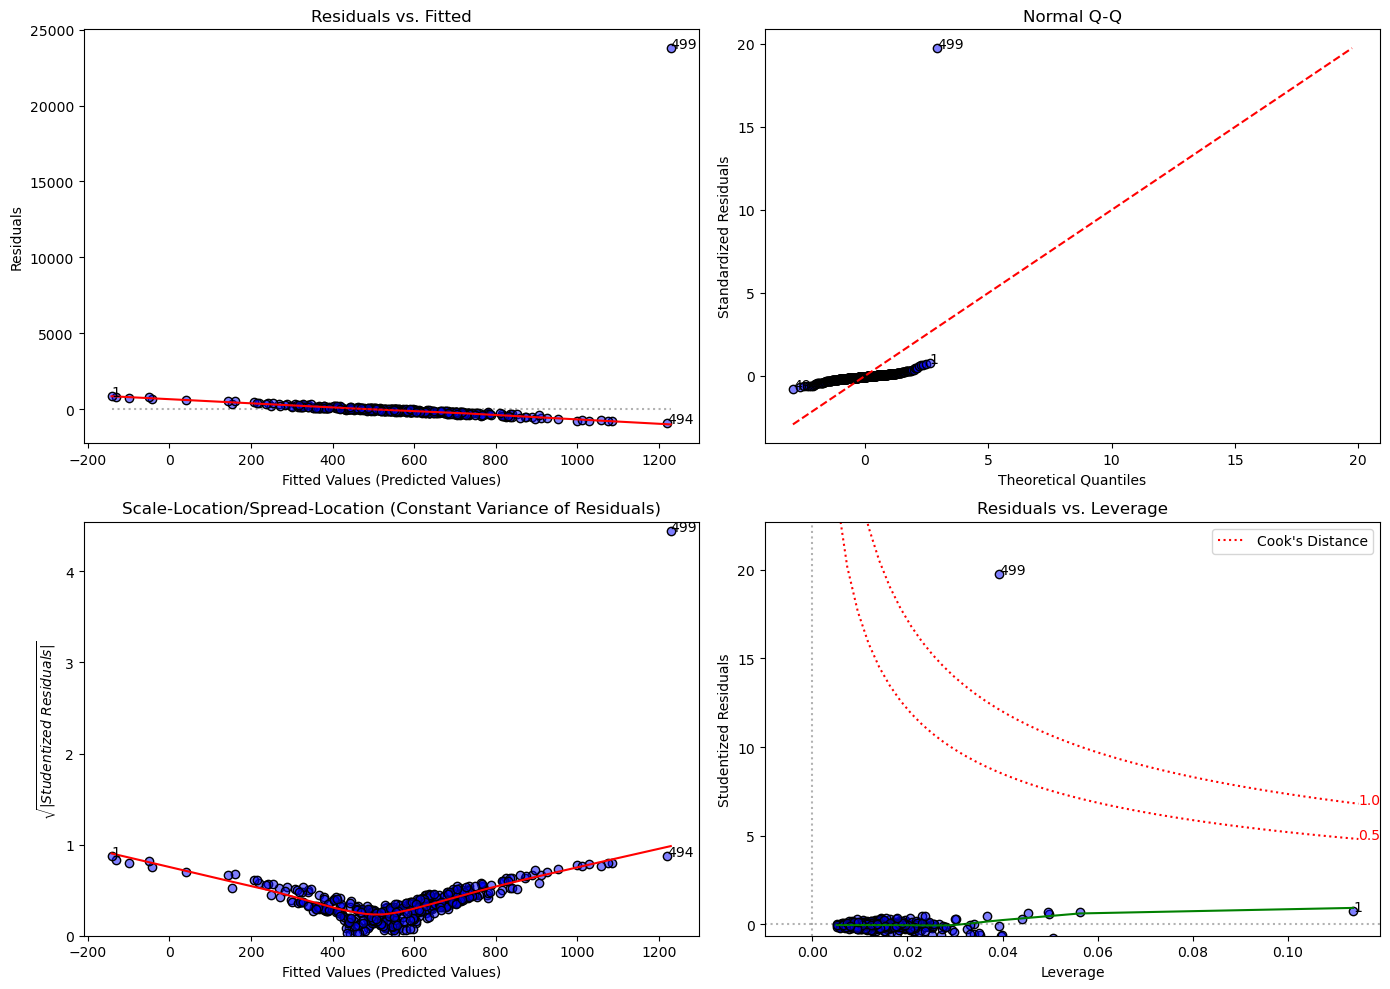

In [39]:
#residual_plots(multiple_reg) #replace with your model name
                            # get residual plots of model


residual_plots(multiple_reg_Cat)
# Residuals vs Fitted plot analyis: The residuals should be randomly scattered around the centerline of 0. 
# Linearity: Residuals spread randomly across the range of fitted values without a clear pattern, 
#            indicating that the model is likely linear.
# Homoscedasticity: Residuals have a relatively constant spread across the fitted values, with no evident "fanning" pattern. 
#                   This suggests that the model does not have severe issues with heteroscedasticity.
# Independence of Errors: Residuals appear to be randomly scattered around the horizontal axis (at 0) 
#                         with no discernible pattern or systematic trend, indicating that the residuals may be independent.
#                         No Clustering: There is no visible grouping or correlation between the residuals and fitted values. 
#                         If there were patterns like a funnel shape, waves, or clustering, it would suggest a violation of independence.
                          

# Q-Q plot analysis:
# Overprediction: Points in the tails of the Q-Q plot will deviate from the reference line. 
# In the left tail, points are above the line, and in the right tail, points are below the line.
# Underprediction: Points in the tails will also deviate from the reference line, but in the opposite manner. 
# In the left tail, points are below the line, and in the right tail, points are above the line.

# Homescedasticity/Heteroscedasticity:
# Plot shows "U-shaped" pattern, where residuals start higher on the left, decrease in the middle, and increase again on the right.
# This pattern indicates HETEROSCEDASTICITY, meaning the variance of the residuals is not constant across the range of fitted values.
# FOR HOMOSCEDASTICITY, The residuals are spread evenly across the range of fitted (predicted) values, with no clear pattern 
# (i.e., the residuals should not fan out or funnel as you move along the x-axis).

# RESIDUALS VS LEVERAGE:
# Outliers: The point with a very large studentized residual is a likely outlier.
# Leverage: There aren’t any extreme leverage points, suggesting that most data points are not far from the mean of the independent variables.
# Influential points: The point near the Cook’s Distance contour of 1 (possibly 499) is potentially influential 
# and may be unduly affecting the model.

### MLR By Removing Influential Points:

In [40]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [41]:
# Get the influence statistics for the model such as Cook's distance, leverage, DFFITS, Studentized residuals, etc.
influence_points = OLSInfluence(multiple_reg_Cat) # results is output from the MLR using all attributes model built earlier
pd.DataFrame(influence_points.influence).describe()

0
count  396.000000
mean     1.810042
std     49.773739
min    -48.959830
25%     -2.310583
50%     -0.636363
75%      0.860251
max    973.288859

In [42]:
influence_points.summary_frame().head(4)

dfb_const  dfb_Avg. Session Length  dfb_Time on App  dfb_Time on Website  \
216  -0.010963                 0.010737         0.013770             0.000800   
47   -0.002498                 0.003928         0.000286             0.000122   
40    0.004324                -0.004796         0.005522            -0.005254   
165  -0.002743                 0.003821        -0.000942             0.000486   

     dfb_Length of Membership  dfb_Gender_Male   cooks_d  standard_resid  \
216                  0.004886         0.015139  0.000073       -0.181088   
47                   0.000174        -0.000021  0.000003        0.027104   
40                   0.012668        -0.000532  0.000079        0.195720   
165                  0.002124         0.004263  0.000008       -0.065759   

     hat_diag  dffits_internal  student_resid    dffits  
216  0.013260        -0.020992      -0.180863 -0.020966  
47   0.026736         0.004492       0.027069  0.004486  
40   0.012263         0.021808       0.195478  0.021781  
165  0.010366        -0.006730      -0.065675 -0.006721

In [43]:
influence_points.influence[influence_points.influence>=1], len(influence_points.influence[influence_points.influence>=1])

(40      2.966878
 60      1.345674
 57      1.555336
 286     1.388654
 251     2.158324
          ...    
 7      13.220002
 44      1.366239
 331     1.259339
 342     1.979083
 13      8.158643
 Length: 89, dtype: float64,
 89)

In [44]:
# Removal of influence points using influence value
customersWithCategorical = customers.copy()
customersWithCategorical.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent', 'Gender'],
      dtype='object')

In [45]:
influence_data_points = pd.DataFrame(influence_points.influence[influence_points.influence>=1])
customersWithCategorical['influence_value']= influence_points.influence
customersWithCategorical.loc[influence_data_points.index,].sort_values(['influence_value'], ascending = False).head()

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
499            32.836941    10.256549        36.143908              0.789520   
1              34.603311    12.207298        33.913847              6.922689   
5              34.507551    11.975406        37.635756              5.705154   
0              34.374258    15.126994        37.157624              5.377594   
11             33.215472    12.135101        37.142094              5.840506   

     Yearly Amount Spent  Gender  influence_value  
499         25006.670580    Male       973.288859  
1             744.221867    Male       113.699561  
5             700.917092    Male        49.628139  
0             765.518462  Female        42.516074  
11            663.803693    Male        36.183946

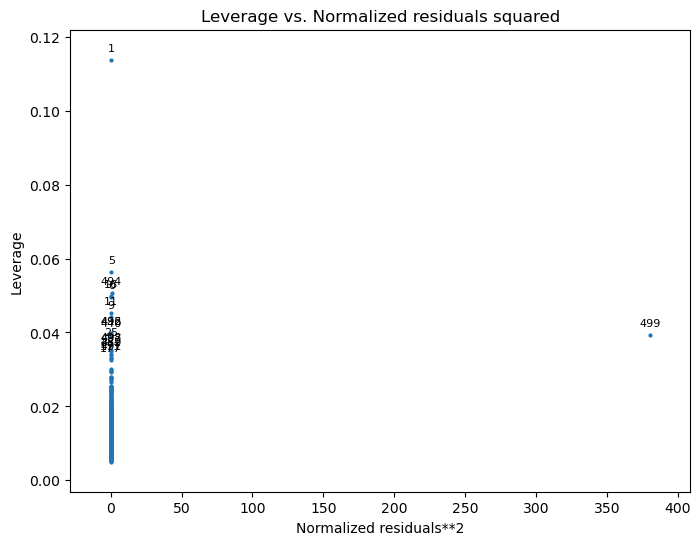

In [46]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
fig = plot_leverage_resid2(multiple_reg_Cat, ax=ax)

# Customize marker size
for line in ax.get_lines():
    line.set_markersize(2)  # Reduce marker size

# Customize annotation font size
for text in ax.texts:
    text.set_fontsize(8)  # Reduce annotation font size

plt.show()


In [47]:
customersWithCategorical.loc[[0, 1, 499]] #looking at Influential points

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0              34.374258    15.126994        37.157624              5.377594   
1              34.603311    12.207298        33.913847              6.922689   
499            32.836941    10.256549        36.143908              0.789520   

     Yearly Amount Spent  Gender  influence_value  
0             765.518462  Female        42.516074  
1             744.221867    Male       113.699561  
499         25006.670580    Male       973.288859

In [48]:
# Removal of influential points based on above plot
# XWithCateg = XWithCateg.drop([0, 1, 491, 499])

# DROP ALL ROWS in 'XCateg' where the influence value is >= 1
customersWithCategorical = customersWithCategorical.drop(influence_data_points.index)
# Drop the influence value column for plotting
customersWithCategorical = customersWithCategorical.drop('influence_value', axis=1)

In [49]:
# Dataframe with all influential points removed
customersWithCategorical.head(3) #Check that 'influence_value' column is removed

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
3             34.967610    13.919494        37.952013              5.066697   
10            34.482388    13.283033        35.907298              4.968743   
15            31.945396    12.965761        36.966389              6.076654   

    Yearly Amount Spent  Gender  
3            712.396327  Female  
10           666.125592  Female  
15           657.019924  Female

In [50]:
from sklearn.model_selection import train_test_split

# Dummification of categorical variable
customersWithCategEncoded = pd.get_dummies(customersWithCategorical, drop_first=True, dtype='int16')
customersWithCategEncoded.head(3)

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
3             34.967610    13.919494        37.952013              5.066697   
10            34.482388    13.283033        35.907298              4.968743   
15            31.945396    12.965761        36.966389              6.076654   

    Yearly Amount Spent  Gender_Male  
3            712.396327            0  
10           666.125592            0  
15           657.019924            0

In [51]:
X = customersWithCategEncoded.drop(['Yearly Amount Spent'], axis=1) #independent attributes
y = customersWithCategEncoded['Yearly Amount Spent'] #dependent variable (target variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) #train test split
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((324, 5), (324,), (82, 5), (82,))

In [55]:
import statsmodels.api as sm

# adding the Constant term
X_train= sm.add_constant(X_train)
X_train.head()

X_test= sm.add_constant(X_test)
X_test.head()

multiple_reg_Cat = sm.OLS(y_train, X_train).fit()
print(multiple_reg_Cat.summary()) #build a model using all attributes

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.972
Model:                             OLS   Adj. R-squared:                  0.972
Method:                  Least Squares   F-statistic:                     2225.
Date:                 Thu, 19 Sep 2024   Prob (F-statistic):          5.56e-245
Time:                         18:35:00   Log-Likelihood:                -1257.1
No. Observations:                  324   AIC:                             2526.
Df Residuals:                      318   BIC:                             2549.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -

In [56]:
coeff("MLR_All_Removing_Influential_points", multiple_reg_Cat.params)

MLR_All_incl_Categorical_features  \
const                                       6567.421165   
Avg. Session Length                          -33.034000   
Time on App                                 -112.991482   
Time on Website                              -71.970542   
Length of Membership                        -204.159096   
Gender_Male                                 -332.491951   

                      MLR_All_features_Box_Cox_On-X  \
const                                   6567.421165   
Avg. Session Length                      -33.034000   
Time on App                             -112.991482   
Time on Website                          -71.970542   
Length of Membership                    -204.159096   
Gender_Male                             -332.491951   

                      MLR_All_features_Box_Cox_On-y  \
const                                      1.135659   
Avg. Session Length                        0.000247   
Time on App                                0.000341   
Time on Website                            0.000003   
Length of Membership                       0.000556   
Gender_Male                               -0.000082   

                      MLR_All_Removing_Influential_points  \
const                                        -1018.589686   
Avg. Session Length                             25.280644   
Time on App                                     37.805958   
Time on Website                                  0.485492   
Length of Membership                            59.709542   
Gender_Male                                     -5.199532   

                      MLR_All_Removing_Influential_points  
const                                        -1018.589686  
Avg. Session Length                             25.280644  
Time on App                                     37.805958  
Time on Website                                  0.485492  
Length of Membership                            59.709542  
Gender_Male                                     -5.199532

In [57]:
# Get error metrics
scores = get_metrics(y_train, multiple_reg_Cat.predict(X_train), y_test, multiple_reg_Cat.predict(X_test), "MLR_All_attrib_Influential_removed", scores)
scores

Model   MAE_Train     MSE_Train   RMSE_Train  \
0           MLR_with_Categ_attributes  236.143762  1.486420e+06  1219.188174   
1          MLR_Box_Cox_Transform-On-X  236.143762  1.486420e+06  1219.188174   
2          MLR_Box_Cox_Transform-On-y    0.000164  2.067951e-07     0.000455   
3  MLR_All_attrib_Influential_removed    7.843717  1.372752e+02    11.716449   
4  MLR_All_attrib_Influential_removed    7.843717  1.372752e+02    11.716449   

   MAPE_Train    MAE_Test      MSE_Test   RMSE_Test  MAPE_Test        R2  \
0   39.056428  156.498540  41288.559685  203.195865  31.798621  0.021787   
1   39.056428  156.498540  41288.559685  203.195865  31.798621  0.021787   
2    0.014285   54.519927   2991.250401   54.692325  97.921457  0.724761   
3    1.689400    8.776639    162.212119   12.736252   1.825629  0.972210   
4    1.689400    8.776639    162.212119   12.736252   1.825629  0.972210   

   RAE_Train  RSE_Train   RAE_Test    RSE_Test  
0   1.659035   0.978213   2.935542    8.755543  
1   1.659035   0.978213   2.935542    8.755543  
2   0.259843   0.275239  16.181541  158.827271  
3   0.140114   0.027790   0.153342    0.036250  
4   0.140114   0.027790   0.153342    0.036250

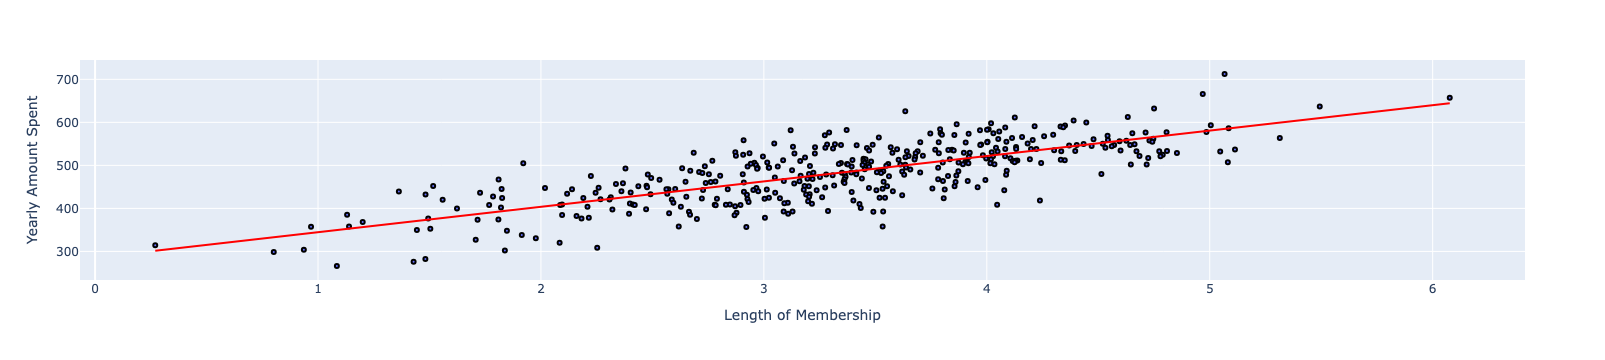

In [58]:
# Plot the scatterplot without the influential points
import plotly.express as px
fig_without_outliers = px.scatter(customersWithCategorical, x="Length of Membership", y="Yearly Amount Spent",trendline="ols")

# Update the marker size, add a black outline, and set the marker shape to square
fig_without_outliers.update_traces(marker=dict(symbol="circle", 
                                               size=4,  # Set marker size
                                               line=dict(width=2, color='black')  # Black outline
                                              ))

# Update the trendline color to red
fig_without_outliers.update_traces(line=dict(color='red'))
fig_without_outliers.show() #plot sactter plot between "Length of Membership","Yearly Amount Spent"

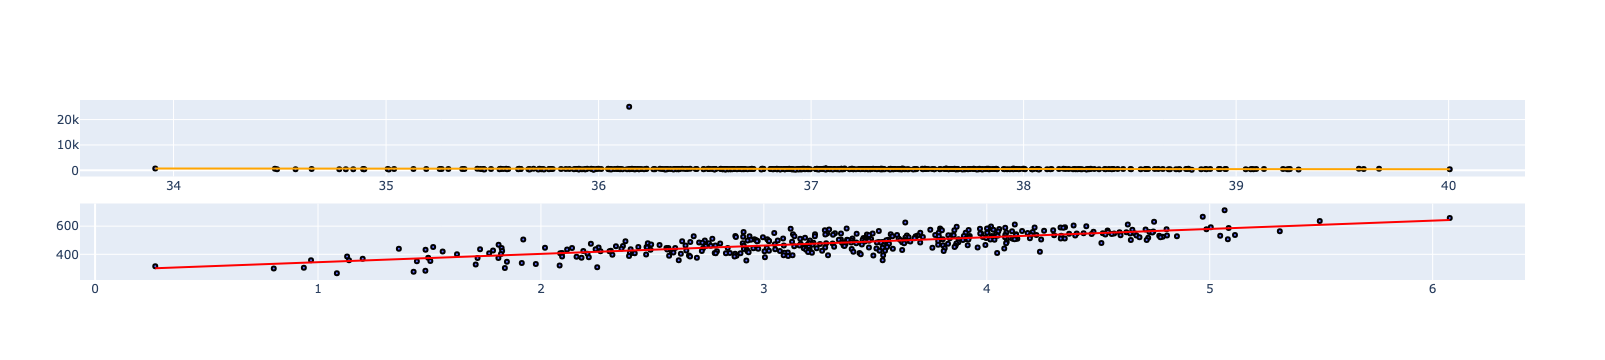

In [59]:
from plotly.subplots import make_subplots

figures = [
            fig_with_outliers,
            fig_without_outliers
    ]

fig = make_subplots(rows=len(figures), cols=1)



for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)
        # Update the marker size, add a black outline, and set the marker shape to square
        fig.update_traces(marker=dict(symbol="circle", 
                                               size=4,  # Set marker size
                                               line=dict(width=2, color='black')  # Black outline
                                              ))

fig.show()


## Multi-colinearity:
- Multicollinearity in linear regression occurs when two or more independent variables are highly correlated, meaning they provide redundant information. This can make it difficult for the model to accurately estimate the relationship between each predictor and the dependent variable.

In [60]:
customersWithCategorical.head() #get snapshot of clean data

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
3             34.967610    13.919494        37.952013              5.066697   
10            34.482388    13.283033        35.907298              4.968743   
15            31.945396    12.965761        36.966389              6.076654   
21            33.871038    12.026925        34.476878              5.493507   
22            33.085298    11.975406        38.315648              4.750360   

    Yearly Amount Spent  Gender  
3            712.396327  Female  
10           666.125592  Female  
15           657.019924  Female  
21           637.102448    Male  
22           632.123588  Female

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #import VIF

In [62]:
customers_dummified = pd.get_dummies(customersWithCategorical,drop_first=True,dtype='int16') #dummification
customers_dummified.head(2)

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
3             34.967610    13.919494        37.952013              5.066697   
10            34.482388    13.283033        35.907298              4.968743   

    Yearly Amount Spent  Gender_Male  
3            712.396327            0  
10           666.125592            0

In [63]:
# REMOVING MULTICOLINEARITY: REMOVING THE COLUMNS WITH HIGH VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Drop 'Yearly Amount Spent' column from the VIF calculation
customers_dummified_excl_target = customers_dummified.drop(columns=['Yearly Amount Spent'])

# Create an empty DataFrame to store VIF data
vif_data = pd.DataFrame()
vif_data["feature"] = customers_dummified_excl_target.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(customers_dummified_excl_target.values, i)
                          for i in range(len(customers_dummified_excl_target.columns))]

# Sort VIF data in descending order
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
vif_data_sorted

feature         VIF
2       Time on Website  800.712066
0   Avg. Session Length  659.383767
1           Time on App  172.552616
3  Length of Membership   25.230582
4           Gender_Male    4.038365

In [64]:
sns.heatmap(customers_dummified_excl_target.corr(),annot=True,cmap='Greens') #plot correlation plot

<Axes: >

In [65]:
# Drop highly correlated attributes
customers_dummified_VIF=customers_dummified.drop(["Avg. Session Length","Time on Website"],axis=1) 

In [66]:
customers_dummified_VIF.head(2)

Time on App  Length of Membership  Yearly Amount Spent  Gender_Male
3     13.919494              5.066697           712.396327            0
10    13.283033              4.968743           666.125592            0

In [67]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_VIF_numeric = customers_dummified_VIF.drop(['Yearly Amount Spent', 'Gender_Male'], axis=1) #Drop these columns (cannot standardize categorical 'gender_male' column)
y_VIF = customers_dummified_VIF['Yearly Amount Spent']
customers_dummified_gender_col = customers_dummified_VIF[['Gender_Male']]

vars=['Time on App', 'Length of Membership']

#Standardization
scaler = StandardScaler()
X_VIF_numeric[vars] = scaler.fit_transform(X_VIF_numeric[vars])
X_VIF = pd.concat([X_VIF_numeric, customers_dummified_gender_col], axis=1)

# ** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

## Spilit the data into Training and Testing Data
X_train_VIF, X_test_VIF, y_train_VIF, y_test_VIF = train_test_split(X_VIF, y_VIF, test_size=0.2, random_state=101)
X_train_VIF.shape, y_train_VIF.shape, X_test_VIF.shape, y_test_VIF.shape


# adding the Constant term
X_train_VIF = sm.add_constant(X_train_VIF)
X_test_VIF = sm.add_constant(X_test_VIF)


In [68]:
X_train_VIF.head(3)

const  Time on App  Length of Membership  Gender_Male
352    1.0     0.237964              0.016093            1
162    1.0    -0.593755              1.395704            0
81     1.0    -0.354019              1.454669            0

In [69]:
multiple_reg_VIF= sm.OLS(y_train_VIF, X_train_VIF).fit()
print(multiple_reg_VIF.summary())#build regression model

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.861
Model:                             OLS   Adj. R-squared:                  0.860
Method:                  Least Squares   F-statistic:                     662.1
Date:                 Thu, 19 Sep 2024   Prob (F-statistic):          7.55e-137
Time:                         18:36:15   Log-Likelihood:                -1517.6
No. Observations:                  324   AIC:                             3043.
Df Residuals:                      320   BIC:                             3058.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

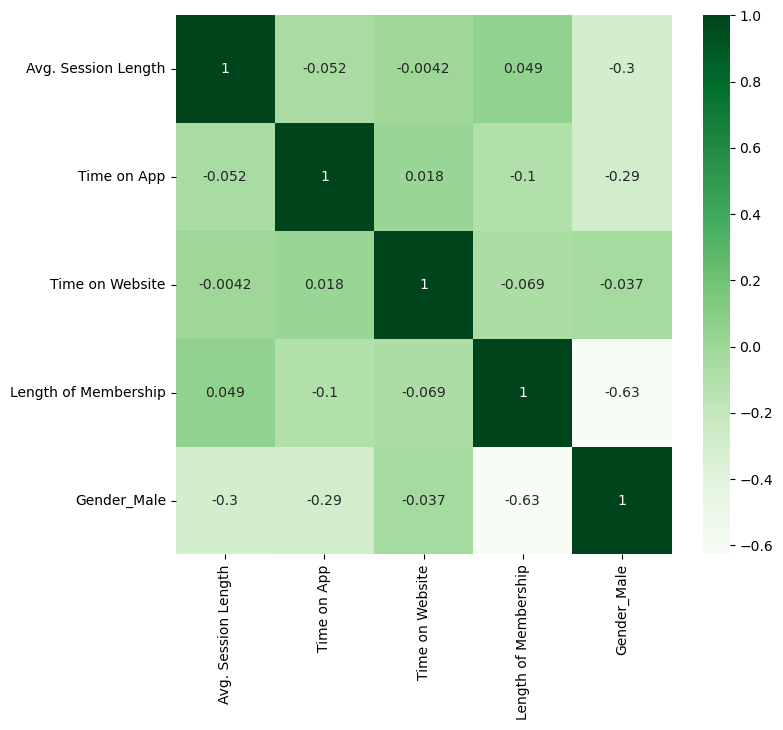

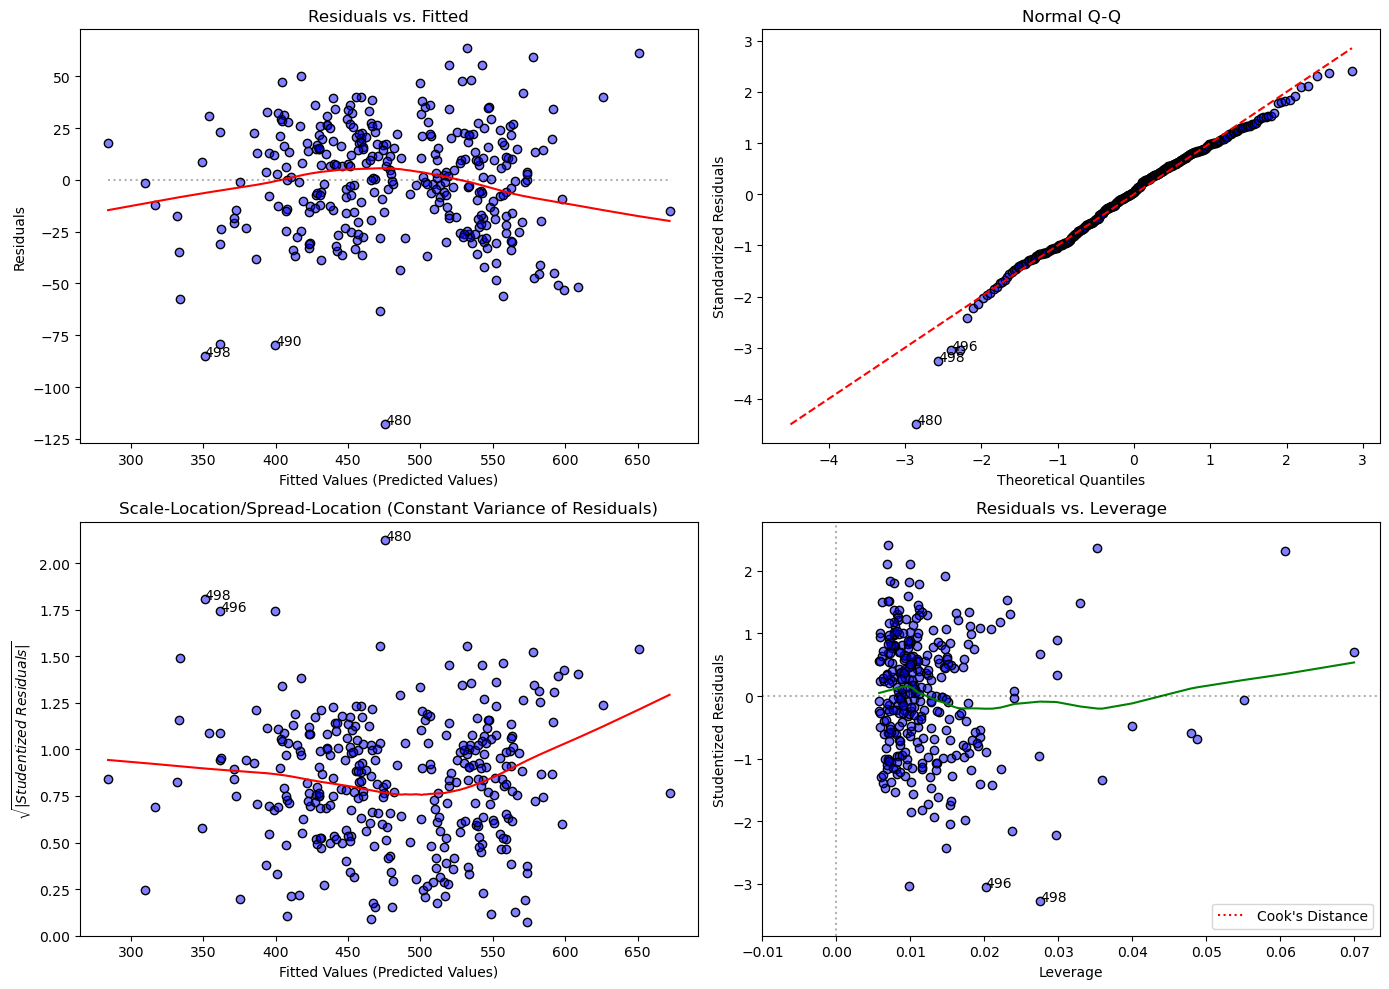

In [70]:
residual_plots(multiple_reg_VIF)#get residual plot

In [71]:
#get coefficients
coefficients=coeff("MLR_using_VIF",multiple_reg_VIF.params)
coefficients

MLR_All_incl_Categorical_features  \
const                                       6567.421165   
Avg. Session Length                          -33.034000   
Time on App                                 -112.991482   
Time on Website                              -71.970542   
Length of Membership                        -204.159096   
Gender_Male                                 -332.491951   

                      MLR_All_features_Box_Cox_On-X  \
const                                   6567.421165   
Avg. Session Length                      -33.034000   
Time on App                             -112.991482   
Time on Website                          -71.970542   
Length of Membership                    -204.159096   
Gender_Male                             -332.491951   

                      MLR_All_features_Box_Cox_On-y  \
const                                      1.135659   
Avg. Session Length                        0.000247   
Time on App                                0.000341   
Time on Website                            0.000003   
Length of Membership                       0.000556   
Gender_Male                               -0.000082   

                      MLR_All_Removing_Influential_points  \
const                                        -1018.589686   
Avg. Session Length                             25.280644   
Time on App                                     37.805958   
Time on Website                                  0.485492   
Length of Membership                            59.709542   
Gender_Male                                     -5.199532   

                      MLR_All_Removing_Influential_points  MLR_using_VIF  
const                                        -1018.589686     502.372211  
Avg. Session Length                             25.280644            NaN  
Time on App                                     37.805958      29.453192  
Time on Website                                  0.485492            NaN  
Length of Membership                            59.709542      45.090789  
Gender_Male                                     -5.199532     -35.499712

In [72]:
#get error metrics
scores = get_metrics(y_train_VIF,multiple_reg_VIF.predict(X_train_VIF),y_test_VIF,multiple_reg_VIF.predict(X_test_VIF),"MLR_after_VIF",scores)
scores

Model   MAE_Train     MSE_Train   RMSE_Train  \
0           MLR_with_Categ_attributes  236.143762  1.486420e+06  1219.188174   
1          MLR_Box_Cox_Transform-On-X  236.143762  1.486420e+06  1219.188174   
2          MLR_Box_Cox_Transform-On-y    0.000164  2.067951e-07     0.000455   
3  MLR_All_attrib_Influential_removed    7.843717  1.372752e+02    11.716449   
4  MLR_All_attrib_Influential_removed    7.843717  1.372752e+02    11.716449   
5                       MLR_after_VIF   20.855987  6.853507e+02    26.179204   

   MAPE_Train    MAE_Test      MSE_Test   RMSE_Test  MAPE_Test        R2  \
0   39.056428  156.498540  41288.559685  203.195865  31.798621  0.021787   
1   39.056428  156.498540  41288.559685  203.195865  31.798621  0.021787   
2    0.014285   54.519927   2991.250401   54.692325  97.921457  0.724761   
3    1.689400    8.776639    162.212119   12.736252   1.825629  0.972210   
4    1.689400    8.776639    162.212119   12.736252   1.825629  0.972210   
5    4.490562   19.279893    521.999604   22.847311   4.086278  0.861255   

   RAE_Train  RSE_Train   RAE_Test    RSE_Test  
0   1.659035   0.978213   2.935542    8.755543  
1   1.659035   0.978213   2.935542    8.755543  
2   0.259843   0.275239  16.181541  158.827271  
3   0.140114   0.027790   0.153342    0.036250  
4   0.140114   0.027790   0.153342    0.036250  
5   0.372556   0.138745   0.336850    0.116652

## Recursive Feature Elimination

In [73]:
from sklearn.feature_selection import RFE #import RFE

In [75]:
X_train.head(2)

const  Avg. Session Length  Time on App  Time on Website  \
352    1.0            31.853075    12.149375        37.325334   
162    1.0            32.912785    11.365492        37.607793   

     Length of Membership  Gender_Male  
352              3.361815            1  
162              4.599937            0

In [74]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

indp_vars = X
min_aic = 10**100 # initiailizing AIC to a very large value
for i in range(indp_vars.shape[1],0,-1):
    regression_model = LinearRegression()
    rfe = RFE(regression_model, n_features_to_select=i)
    rfe = rfe.fit(X_train, y_train)
    chk = X_train.loc[:,list(rfe.support_)]
    print(chk.columns)
    regression_model=sm.OLS(y_train,chk)
    result=regression_model.fit()
    current_aic = result.aic
    print(current_aic)
    if(current_aic <= min_aic):
        min_aic = current_aic
        bestmodel = chk.columns
    else:
        print("Break !")
        break

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Gender_Male'],
      dtype='object')
2884.05952656922
Index(['Avg. Session Length', 'Time on App', 'Length of Membership',
       'Gender_Male'],
      dtype='object')
3019.3121068726477
Break !


In [75]:
bestmodel_data = X_train.loc[:,bestmodel]
bestmodel_data_test = X_test.loc[:,bestmodel]
bestmodel_data['const'] =1
bestmodel_data_test['const'] =1
bestmodel_data.head() #splitt data using bestmodel data

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
352            31.853075    12.149375        37.325334              3.361815   
162            32.912785    11.365492        37.607793              4.599937   
81             34.080260    11.591440        36.456898              4.652854   
59             34.497268    12.655651        39.577668              4.082621   
260            31.358477    12.809883        36.549668              3.637701   

     Gender_Male  const  
352            1      1  
162            0      1  
81             0      1  
59             0      1  
260            1      1

In [76]:
y_test.shape #shape of Y test

(82,)

In [77]:
rfe_model=sm.OLS(y_train,bestmodel_data).fit()
print(rfe_model.summary2()) #build a regression model

                       Results: Ordinary least squares
Model:                  OLS                   Adj. R-squared:       0.972    
Dependent Variable:     Yearly Amount Spent   AIC:                  2526.1961
Date:                   2024-09-19 18:40      BIC:                  2548.8806
No. Observations:       324                   Log-Likelihood:       -1257.1  
Df Model:               5                     F-statistic:          2225.    
Df Residuals:           318                   Prob (F-statistic):   5.56e-245
R-squared:              0.972                 Scale:                139.87   
-----------------------------------------------------------------------------
                       Coef.    Std.Err.    t     P>|t|    [0.025     0.975] 
-----------------------------------------------------------------------------
Avg. Session Length     25.2806   0.7106  35.5777 0.0000    23.8826   26.6787
Time on App             37.8060   0.8040  47.0226 0.0000    36.2241   39.3878
Time on W

In [78]:
#get coefficients
coefficients=coeff("MLR_after_RFE",rfe_model.params)
coefficients

MLR_All_incl_Categorical_features  \
const                                       6567.421165   
Avg. Session Length                          -33.034000   
Time on App                                 -112.991482   
Time on Website                              -71.970542   
Length of Membership                        -204.159096   
Gender_Male                                 -332.491951   

                      MLR_All_features_Box_Cox_On-X  \
const                                   6567.421165   
Avg. Session Length                      -33.034000   
Time on App                             -112.991482   
Time on Website                          -71.970542   
Length of Membership                    -204.159096   
Gender_Male                             -332.491951   

                      MLR_All_features_Box_Cox_On-y  \
const                                      1.135659   
Avg. Session Length                        0.000247   
Time on App                                0.000341   
Time on Website                            0.000003   
Length of Membership                       0.000556   
Gender_Male                               -0.000082   

                      MLR_All_Removing_Influential_points  \
const                                        -1018.589686   
Avg. Session Length                             25.280644   
Time on App                                     37.805958   
Time on Website                                  0.485492   
Length of Membership                            59.709542   
Gender_Male                                     -5.199532   

                      MLR_All_Removing_Influential_points  MLR_using_VIF  \
const                                        -1018.589686     502.372211   
Avg. Session Length                             25.280644            NaN   
Time on App                                     37.805958      29.453192   
Time on Website                                  0.485492            NaN   
Length of Membership                            59.709542      45.090789   
Gender_Male                                     -5.199532     -35.499712   

                      MLR_after_RFE  
const                  -1018.589686  
Avg. Session Length       25.280644  
Time on App               37.805958  
Time on Website            0.485492  
Length of Membership      59.709542  
Gender_Male               -5.199532

In [79]:
#get error metrics
scores = get_metrics(y_train,rfe_model.predict(bestmodel_data),y_test,rfe_model.predict(bestmodel_data_test),"MLR_after_VIF_RFE",scores)
scores

Model   MAE_Train     MSE_Train   RMSE_Train  \
0           MLR_with_Categ_attributes  236.143762  1.486420e+06  1219.188174   
1          MLR_Box_Cox_Transform-On-X  236.143762  1.486420e+06  1219.188174   
2          MLR_Box_Cox_Transform-On-y    0.000164  2.067951e-07     0.000455   
3  MLR_All_attrib_Influential_removed    7.843717  1.372752e+02    11.716449   
4  MLR_All_attrib_Influential_removed    7.843717  1.372752e+02    11.716449   
5                       MLR_after_VIF   20.855987  6.853507e+02    26.179204   
6                   MLR_after_VIF_RFE    7.843717  1.372752e+02    11.716449   

   MAPE_Train    MAE_Test      MSE_Test   RMSE_Test  MAPE_Test        R2  \
0   39.056428  156.498540  41288.559685  203.195865  31.798621  0.021787   
1   39.056428  156.498540  41288.559685  203.195865  31.798621  0.021787   
2    0.014285   54.519927   2991.250401   54.692325  97.921457  0.724761   
3    1.689400    8.776639    162.212119   12.736252   1.825629  0.972210   
4    1.689400    8.776639    162.212119   12.736252   1.825629  0.972210   
5    4.490562   19.279893    521.999604   22.847311   4.086278  0.861255   
6    1.689400    8.776639    162.212119   12.736252   1.825629  0.972210   

   RAE_Train  RSE_Train   RAE_Test    RSE_Test  
0   1.659035   0.978213   2.935542    8.755543  
1   1.659035   0.978213   2.935542    8.755543  
2   0.259843   0.275239  16.181541  158.827271  
3   0.140114   0.027790   0.153342    0.036250  
4   0.140114   0.027790   0.153342    0.036250  
5   0.372556   0.138745   0.336850    0.116652  
6   0.140114   0.027790   0.153342    0.036250